In [1]:
# Needed modules
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import calmap
from sklearn import linear_model
%matplotlib inline
# Matplotlib style
plt.style.use('ggplot')

In [22]:
fi =  r'F:\tim\Dropbox\Domo\states-hass.txt'
dat = pd.read_csv(fi, skiprows=0, delimiter='\t', header=None,
                  names=['Date','Tablet 1','Tablet 2','Tablet 3','Tablet 4',
                         'Lights bedroom','TV','Boiler','Cover bedroom 1','Cover bedroom 2',
                         'Cover living room 1','Cover living room 2'], na_values=['NA'])
dat.head(3)

,Date,Tablet 1,Tablet 2,Tablet 3,Tablet 4,Lights bedroom,TV,Boiler,Cover bedroom 1,Cover bedroom 2,Cover living room 1,Cover living room 2
0,2018-01-09 13:07:47,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN
1,2018-01-09 13:12:47,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN
2,2018-01-09 13:17:47,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN


In [23]:
dat["Date"] = pd.to_datetime(dat["Date"])
dat = dat.set_index("Date")
dat = dat.ix['2018-01-15':]
daily_states_sum = dat.resample('D').sum()

In [24]:
daily_states_sum.TV

Date
2018-01-15      7
2018-01-16      9
2018-01-17     14
2018-01-18     49
2018-01-19      0
2018-01-20     15
2018-01-21      0
2018-01-22     18
2018-01-23     43
2018-01-24     42
2018-01-25     38
2018-01-26     23
2018-01-27     13
2018-01-28     28
2018-01-29      0
2018-01-30     19
2018-01-31      6
2018-02-01     54
2018-02-02     61
2018-02-03     48
2018-02-04     14
2018-02-05     19
2018-02-06     25
2018-02-07      5
2018-02-08     22
2018-02-09      6
2018-02-10      0
2018-02-11      0
2018-02-12     14
2018-02-13     20
2018-02-14     19
2018-02-15     12
2018-02-16     31
2018-02-17     12
2018-02-18      7
2018-02-19      0
2018-02-20     11
2018-02-21     27
2018-02-22      9
2018-02-23     62
2018-02-24     33
2018-02-25     74
2018-02-26     15
2018-02-27      9
2018-02-28      0
2018-03-01     13
2018-03-02     36
2018-03-03    126
2018-03-04     69
2018-03-05     32
2018-03-06     30
Freq: D, Name: TV, dtype: int64

F:\Anaconda3\envs\py35b\lib\site-packages\calmap\__init__.py:128: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)


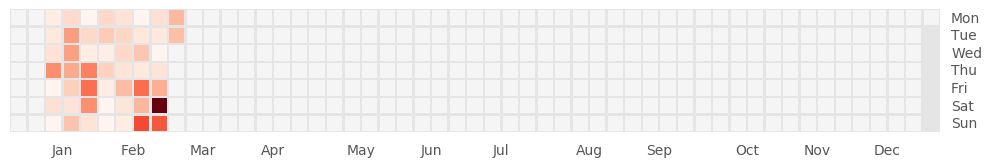

In [25]:
fig = plt.figure(figsize=(12,5))
ax = calmap.yearplot(daily_states_sum.TV)

F:\Anaconda3\envs\py35b\lib\site-packages\calmap\__init__.py:128: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)


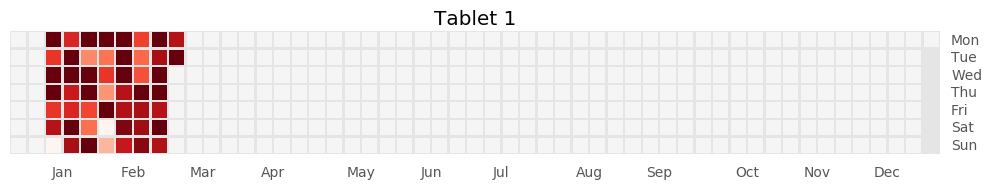

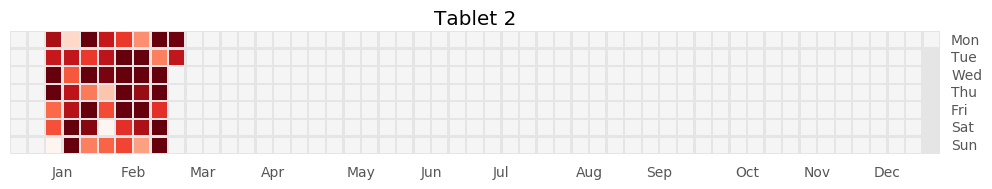

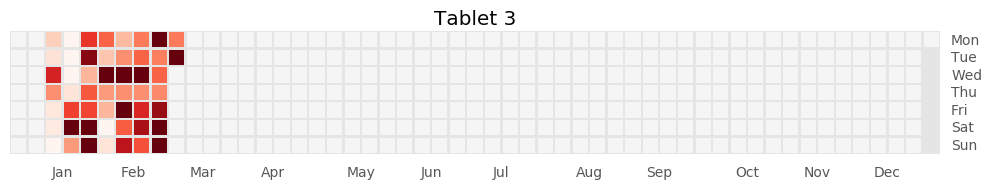

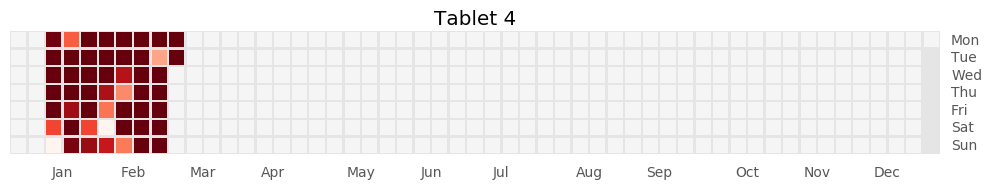

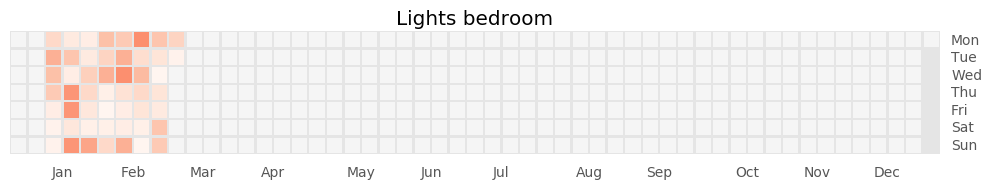

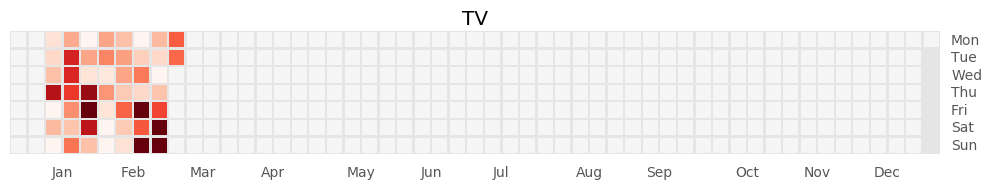

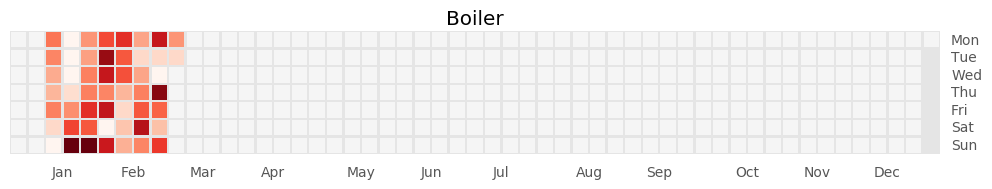

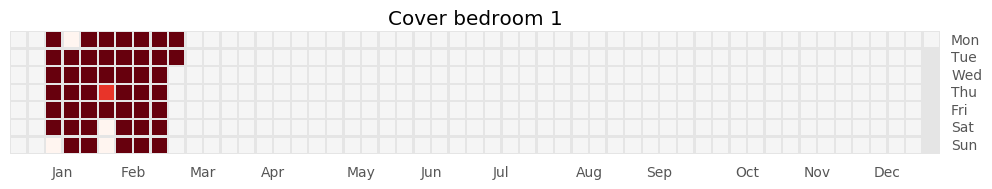

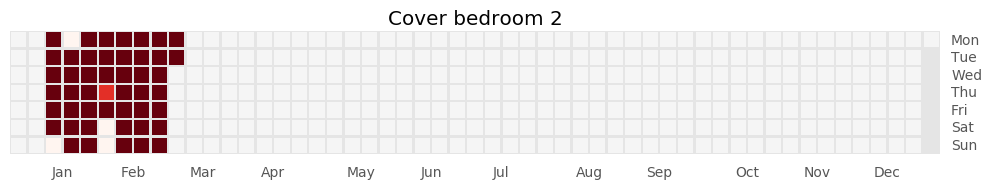

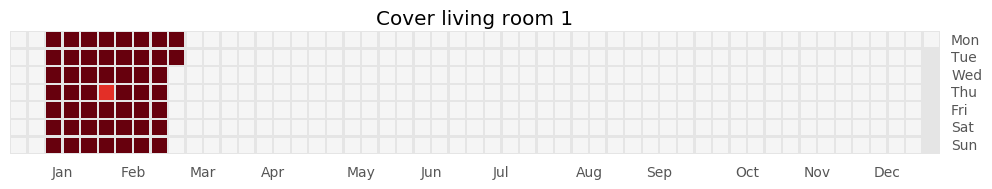

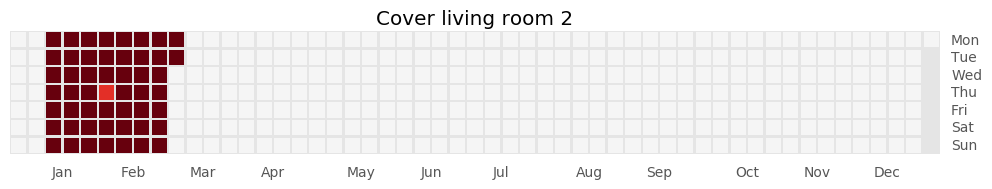

In [27]:
maxi = daily_states_sum.max().max()
maxi = 60 # events = 5 h x 60 min/h / 5 min/event
for variable in daily_states_sum.columns:
    fig = plt.figure(figsize=(12,3))
    ax = calmap.yearplot(daily_states_sum[variable], vmin=0, vmax=maxi)
    ax.set_title(variable)

In [29]:
daily_states_sum.max() * 5 / 60

Tablet 1               15.666667
Tablet 2               15.833333
Tablet 3               13.833333
Tablet 4               16.333333
Lights bedroom          1.916667
TV                     10.500000
Boiler                  6.250000
Cover bedroom 1        21.750000
Cover bedroom 2        21.750000
Cover living room 1    21.750000
Cover living room 2    21.750000
dtype: float64

In [30]:
fi =  r'F:\tim\Dropbox\Domo\sensors-hass.txt'
dat = pd.read_csv(fi, skiprows=0, delimiter='\t', header=None,
                  names=['Date','Tout','Tin 1','Hum in 1','Batt 1',
                         'Sonoff Power 1','Sonoff Power 2','Tin 2','Hum in 2','Batt 2',
                         'Pamb'], na_values=['NA'])
dat.head(3)

,Date,Tout,Tin 1,Hum in 1,Batt 1,Sonoff Power 1,Sonoff Power 2,Tin 2,Hum in 2,Batt 2,Pamb
0,2017-11-03 14:00:01,22.5,24.7,33.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2017-11-03 14:15:01,22.6,24.7,34.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2017-11-03 14:30:01,22.7,24.7,34.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN


In [31]:
dat["Date"] = pd.to_datetime(dat["Date"])
dat = dat.set_index("Date")
dat = dat.ix['2018-01-15':]
daily_sensors_min = dat.resample('D').min()
daily_sensors_max = dat.resample('D').min()
daily_sensors_avg = dat.resample('D').mean()

In [32]:
daily_sensors_avg.Tout

Date
2018-01-15     8.821875
2018-01-16    12.961458
2018-01-17    14.100000
2018-01-18    10.595833
2018-01-19    11.285263
2018-01-20    14.204167
2018-01-21    17.777083
2018-01-22    15.817708
2018-01-23    13.106250
2018-01-24    11.484375
2018-01-25    11.863542
2018-01-26    11.050000
2018-01-27    11.397590
2018-01-28    12.321505
2018-01-29    10.828125
2018-01-30     8.871875
2018-01-31     9.092632
2018-02-01     9.418750
2018-02-02     8.271875
2018-02-03     9.754167
2018-02-04     8.094792
2018-02-05     8.265625
2018-02-06     6.773958
2018-02-07     7.236458
2018-02-08     4.163636
2018-02-09     7.982292
2018-02-10     9.559375
2018-02-11    12.001042
2018-02-12    10.881250
2018-02-13     9.483333
2018-02-14    13.355208
2018-02-15    15.469792
2018-02-16    13.438542
2018-02-17    12.850000
2018-02-18    11.236471
2018-02-19    11.291667
2018-02-20    14.288421
2018-02-21    10.742708
2018-02-22     7.207292
2018-02-23     6.197917
2018-02-24     7.283333
2018-02-25 

F:\Anaconda3\envs\py35b\lib\site-packages\calmap\__init__.py:128: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)


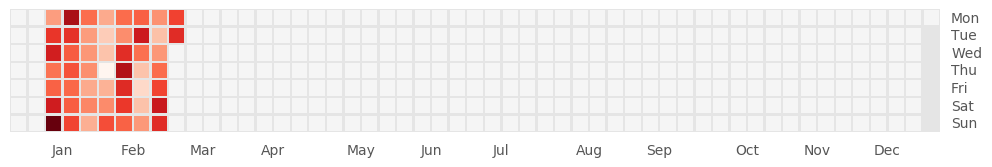

In [33]:
fig = plt.figure(figsize=(12,5))
ax = calmap.yearplot(daily_sensors_avg.Tout, year=2018)

In [34]:
daily_sensors_avg_wday = daily_sensors_avg[(daily_states_sum.index.weekday < 5) & (daily_states_sum.Boiler > 0)]
daily_sensors_avg_wend = daily_sensors_avg[(daily_states_sum.index.weekday > 4) & (daily_states_sum.Boiler > 0)]
daily_states_sum_wday = daily_states_sum[(daily_states_sum.index.weekday < 5) & (daily_states_sum.Boiler > 0)]
daily_states_sum_wend = daily_states_sum[(daily_states_sum.index.weekday > 4) & (daily_states_sum.Boiler > 0)]

x = daily_sensors_avg_wday.Tout.values
y = daily_states_sum_wday.Boiler.values * 5 / 60
x1 = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)
lmwday = linear_model.LinearRegression()
modelwday = lmwday.fit(x1, y)
y1 = lmwday.predict(x1)
x = daily_sensors_avg_wend.Tout.values
y = daily_states_sum_wend.Boiler.values * 5 / 60
x2 = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)
lmwend = linear_model.LinearRegression()
modelwend = lmwend.fit(x2, y)
y2 = lmwend.predict(x2)


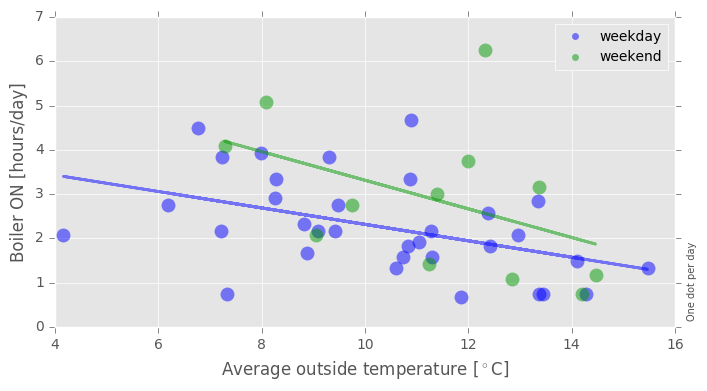

In [35]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.plot(daily_sensors_avg_wday.Tout,daily_states_sum_wday.Boiler * 5 / 60, '.',
         ms=20, mec='none', mfc=[0.0,0.0,1.0,0.5], mew=0, label='weekday')
ax.plot(x1, y1, color=(0.0,0.0,1.0,0.5), lw=2)
ax.plot(daily_sensors_avg_wend.Tout,daily_states_sum_wend.Boiler * 5 / 60, '.',
         ms=20, mec='none', mfc=[0.0,0.6,0.0,0.5], mew=0, label='weekend')
ax.plot(x2, y2, color=(0.0,0.6,0.0,0.5), lw=2)
ax.set_xlabel('Average outside temperature [$^\circ$C]')
ax.set_ylabel('Boiler ON [hours/day]')
ax.text(1.02, 0.02,'One dot per day', fontsize=7, alpha=0.7, rotation=90,
        transform=ax.transAxes,va='bottom')
ax.legend(markerscale=0.5, numpoints=1,fontsize=10, framealpha = 1, loc = 'best')
